<a href="https://colab.research.google.com/github/jaiharish07/jaiharish07/blob/main/DL_in_face_mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
!pip install kaggle

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 88% 143M/163M [00:01<00:00, 118MB/s]
100% 163M/163M [00:01<00:00, 115MB/s]


In [9]:
from zipfile import ZipFile
dataset ='/content/face-mask-dataset.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [10]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [12]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_2639.jpg', 'with_mask_2871.jpg', 'with_mask_1420.jpg', 'with_mask_2454.jpg', 'with_mask_3090.jpg']
['with_mask_2044.jpg', 'with_mask_2789.jpg', 'with_mask_733.jpg', 'with_mask_1512.jpg', 'with_mask_1813.jpg']


In [13]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2057.jpg', 'without_mask_3274.jpg', 'without_mask_470.jpg', 'without_mask_1328.jpg', 'without_mask_3726.jpg']
['without_mask_2806.jpg', 'without_mask_2006.jpg', 'without_mask_2913.jpg', 'without_mask_2176.jpg', 'without_mask_2498.jpg']


In [14]:
print('Number of images with mask :', len(with_mask_files))
print('Number of images without mask :', len(without_mask_files))

Number of images with mask : 3725
Number of images without mask : 3828


In [16]:
with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

In [17]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [18]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


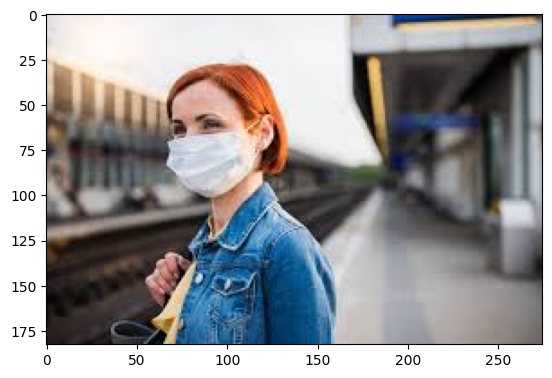

In [21]:
img = mpimg.imread('/content/data/with_mask/with_mask_2700.jpg')
imgplot = plt.imshow(img)
plt.show()

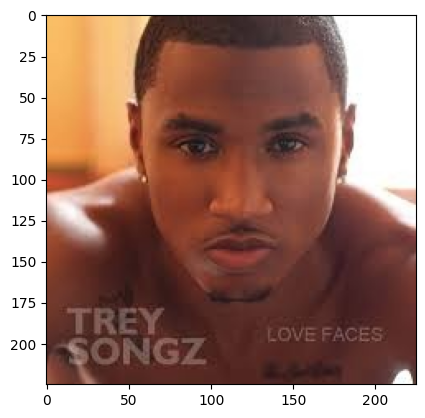

In [58]:
img = mpimg.imread('/content/data/without_mask/without_mask_1038.jpg')
imgplot = plt.imshow(img)
plt.show()

In [26]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


without_mask_path = '/content/data/without_mask/'

for img_file in without_mask_files:

  img = Image.open(without_mask_path + img_file)
  img = img.resize((128,128))
  img = img.convert('RGB')
  img = np.array(img)
  data.append(img)

In [27]:
len(data)

7553

In [ ]:
data[0:7553]

In [29]:
type(data)

list

In [30]:
x=np.array(data)
y=np.array(labels)

In [31]:
print(type(x))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [32]:
y.shape

(7553,)

In [34]:
x.shape

(7553, 128, 128, 3)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [36]:
x_train_scaled= x_train/255
x_test_scaled= x_test/255

In [37]:
x_train_scaled.shape

(6042, 128, 128, 3)

In [38]:
x_test_scaled.shape

(1511, 128, 128, 3)

In [39]:
import tensorflow as tf
from tensorflow import keras

In [41]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [42]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [43]:
history = model.fit(x_train_scaled, y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 154s 891ms/step - loss: 0.4243 - acc: 0.8185 - val_loss: 0.2970 - val_acc: 0.8678
Epoch 2/5
170/170 [==============================] - 148s 872ms/step - loss: 0.2743 - acc: 0.8952 - val_loss: 0.2726 - val_acc: 0.8711
Epoch 3/5
170/170 [==============================] - 149s 879ms/step - loss: 0.2412 - acc: 0.9066 - val_loss: 0.2491 - val_acc: 0.8926
Epoch 4/5
170/170 [==============================] - 153s 898ms/step - loss: 0.1946 - acc: 0.9248 - val_loss: 0.2457 - val_acc: 0.8942
Epoch 5/5
170/170 [==============================] - 153s 897ms/step - loss: 0.1756 - acc: 0.9327 - val_loss: 0.2271 - val_acc: 0.9041


In [44]:
loss, accuracy = model.evaluate(x_test_scaled, y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 14s 293ms/step - loss: 0.1909 - acc: 0.9246
Test Accuracy = 0.9245532751083374


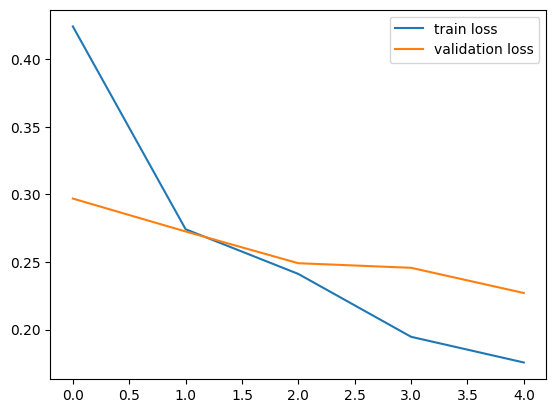

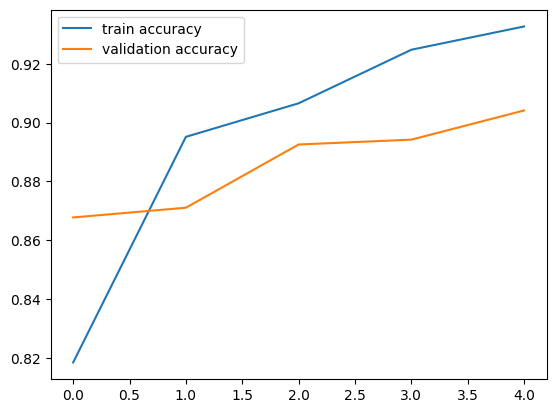

In [45]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Enter the Path of the image to be predicted: /content/data/with_mask/with_mask_1397.jpg


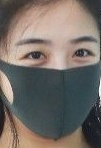

1/1 [==============================] - 0s 32ms/step
[[0.5119426  0.44304565]]
0
The person in the image is wearing a mask


In [51]:
input_image_path = input('Enter the Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')

Enter the Path of the image to be predicted: /content/data/without_mask/without_mask_1380.jpg


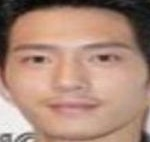

1/1 [==============================] - 0s 33ms/step
[[0.4194258  0.60079616]]
1
The person in the image is not wearing a mask


In [49]:
input_image_path = input('Enter the Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)


input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 0:

  print('The person in the image is  wearing a mask')

else:

  print('The person in the image is not wearing a mask')